In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt 

['test.csv', 'train.csv', 'gender_submission.csv']


### Load data from csv

Load the train and test data in 2 dataframes.

Make the `PassengerId` the index of these dataframes.

In [2]:
df_train = pd.read_csv("../input/train.csv", index_col=['PassengerId'])
df_test = pd.read_csv("../input/test.csv", index_col=['PassengerId'])
df_train.head(n=5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [4]:
df_test.head(n=5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Prepare data for the future model.

The idea is to prepare all the data in int64 or float64, that can be ingested by all the machine learning algorithm.

Use the pipeline from `scikit-learn` and `pandas` to do this.

1. Filter all the used features.
2. Find all `NaN` data and transform them in string type 'Not defined'.
3. Labelised all the string/object datatype.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df_train.drop("Name", axis=1, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print("Number of NaN values: %d" % df_train.isnull().sum().sum())
df_train['Cabin'].fillna('not defined', inplace=True)
df_train['Age'].fillna(0.0, inplace=True)
df_train['Embarked'].fillna('not defined', inplace=True)
df_train.head()



Number of NaN values: 866


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,not defined,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,not defined,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,not defined,S


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

def transform(df, columns):
    for c in columns:
        le.fit(df[c].values)
        df["%s_label" % c] = le.transform(df[c])
    return df

df_train = transform(df_train, ['Sex', 'Cabin', 'Ticket', 'Embarked'])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_label,Cabin_label,Ticket_label,Embarked_label
PassengerId,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,not defined,S,1,147,523,2
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,81,596,0
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,not defined,S,0,147,669,2
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,55,49,2
5,0,3,male,35.0,0,0,373450,8.0500,not defined,S,1,147,472,2


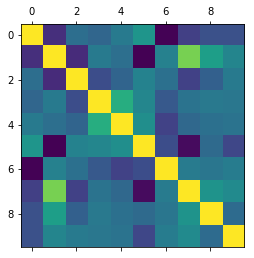

In [9]:
plt.matshow(df_train.corr())

In [16]:
df_train['Cabin'].value_counts()

not defined        687
G6                   4
C23 C25 C27          4
B96 B98              4
C22 C26              3
D                    3
F33                  3
E101                 3
F2                   3
C92                  2
B77                  2
D26                  2
E67                  2
B22                  2
E25                  2
C2                   2
D35                  2
C78                  2
B57 B59 B63 B66      2
C52                  2
C65                  2
B58 B60              2
D36                  2
C124                 2
B51 B53 B55          2
B35                  2
E33                  2
D33                  2
C125                 2
B18                  2
                  ... 
B79                  1
B69                  1
D9                   1
A16                  1
C70                  1
B3                   1
C49                  1
E50                  1
A20                  1
B102                 1
C106                 1
B39                  1
A26        

### DecisionTree Classifier.

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

X = df_train[['Sex_label', 'Cabin_label', 'Ticket_label', 'Embarked_label', 'Pclass', 'Age']]
y = df_train[['Survived']]

clf = DecisionTreeClassifier(random_state=42)
cross_val_score(clf, X, y, cv=10)

array([ 0.77777778,  0.76666667,  0.69662921,  0.85393258,  0.83146067,
        0.73033708,  0.80898876,  0.74157303,  0.82022472,  0.77272727])